In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset = pd.read_csv('../dataset/network_traffic.csv')

In [4]:
dataset.head()

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.736825e+09,2,192.168.1.20192.168.2.20,192.168.1.2,0,192.168.2.2,0,1,0,8,...,20,100,0,3,138,3.0,4.048583e-09,138.0,1.862348e-07,0
1,1.736825e+09,2,192.168.1.30192.168.2.20,192.168.1.3,0,192.168.2.2,0,1,0,0,...,20,100,0,0,0,0.0,0.000000e+00,0.0,0.000000e+00,0
2,1.736825e+09,2,192.168.2.20192.168.1.20,192.168.2.2,0,192.168.1.2,0,1,0,0,...,20,100,0,4,184,4.0,5.442177e-09,184.0,2.503401e-07,0
3,1.736825e+09,1,10.0.2.20192.168.1.30,10.0.2.2,0,192.168.1.3,0,1,0,8,...,20,100,0,4,184,2.0,4.950495e-09,92.0,2.277228e-07,0
4,1.736825e+09,1,10.0.2.255566192.168.1.39798,10.0.2.2,55566,192.168.1.3,9798,6,-1,-1,...,20,100,0,0,0,0.0,0.000000e+00,0.0,0.000000e+00,0


label
1    22429
0    20055
Name: count, dtype: int64


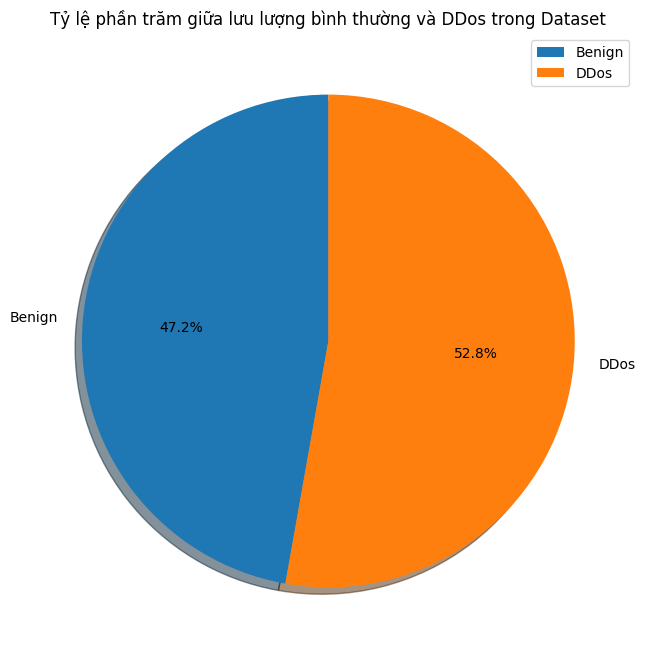

In [65]:
label_counts = dataset.label.value_counts()
labels = ['Benign', "DDos"]
sizes = [dict(label_counts)[0], dict(label_counts)[1]]
print(label_counts)
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(['Benign', "DDos"])
plt.title('Tỷ lệ phần trăm giữa lưu lượng bình thường và DDos trong Dataset')
plt.show()

In [66]:
print(dataset.ip_proto.value_counts())

ip_proto
6     15057
17    14364
1     13063
Name: count, dtype: int64


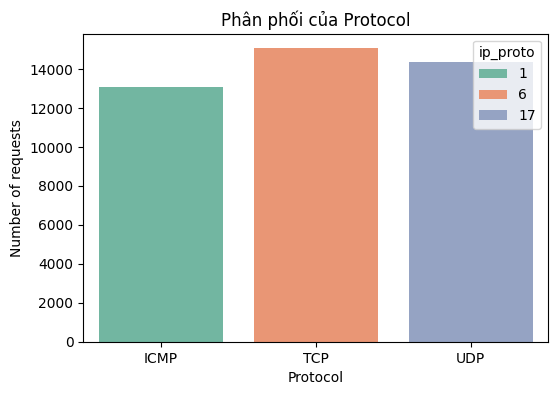

In [67]:
# 2. Biểu đồ phân phối của Protocol
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='ip_proto', palette="Set2", hue="ip_proto")
plt.title('Phân phối của Protocol')
plt.xlabel('Protocol')
plt.ylabel('Number of requests')
plt.xticks([0, 1, 2], ['ICMP', 'TCP', 'UDP'])
plt.show()

Preprocessing Data

In [4]:
# Preprocess dataset
dataset['ip_src'] = dataset['ip_src'].str.replace('.', '')
dataset['ip_dst'] = dataset['ip_dst'].str.replace('.', '')
dataset['flow_id'] = dataset['flow_id'].str.replace('.', '')

features = ['ip_src', 'ip_dst', 'tp_src', 'tp_dst', 'flow_duration_nsec', 'flags', 
            'packet_count', 'flow_duration_sec', 'byte_count', 
            'packet_count_per_second', 'byte_count_per_second']

X = dataset[features].values.astype("float")
y = dataset['label'].values

 # Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Logistic Regression

In [8]:
# Khởi tạo mô hình Logistic Regression
logreg_model = LogisticRegression()

# Huấn luyện mô hình
logreg_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_logreg = logreg_model.predict(X_test)

# Đánh giá mô hình
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 93.56%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     70001
           1       0.93      0.95      0.94     78693

    accuracy                           0.94    148694
   macro avg       0.94      0.93      0.94    148694
weighted avg       0.94      0.94      0.94    148694



c:\Users\harry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [9]:
# Khởi tạo mô hình
dt_model = DecisionTreeClassifier()

# Huấn luyện mô hình
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)

# Đánh giá mô hình
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70001
           1       1.00      1.00      1.00     78693

    accuracy                           1.00    148694
   macro avg       1.00      1.00      1.00    148694
weighted avg       1.00      1.00      1.00    148694



KNN

In [10]:

# Khởi tạo mô hình
knn_model = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn_model.predict(X_test)

# Đánh giá mô hình
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70001
           1       1.00      1.00      1.00     78693

    accuracy                           1.00    148694
   macro avg       1.00      1.00      1.00    148694
weighted avg       1.00      1.00      1.00    148694



SVM

In [11]:
# Khởi tạo mô hình
svm_model = SVC(kernel='rbf')

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 92.58%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93     70001
           1       1.00      0.86      0.92     78693

    accuracy                           0.93    148694
   macro avg       0.93      0.93      0.93    148694
weighted avg       0.94      0.93      0.93    148694



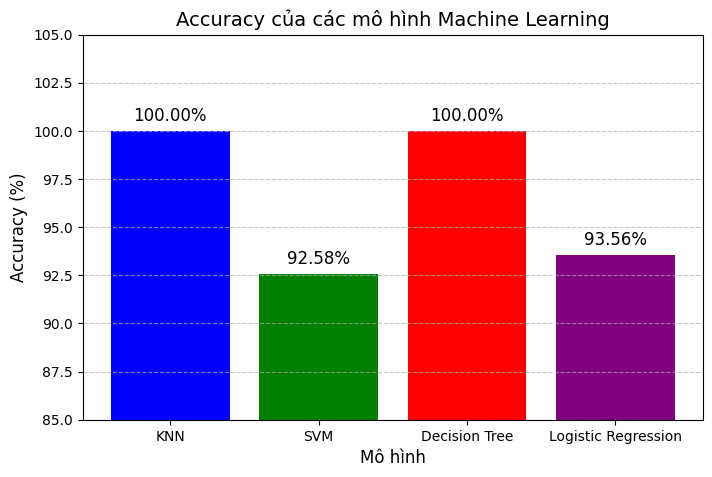

In [11]:
import matplotlib.pyplot as plt

# Dữ liệu accuracy của các mô hình
models = ["KNN", "SVM", "Decision Tree", "Logistic Regression"]
accuracies = [accuracy_knn, accuracy_svm, accuracy_dt, accuracy_logreg]
accuracies = [accuracy * 100 for accuracy in accuracies]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Thêm tiêu đề và nhãn
plt.title("Accuracy của các mô hình Machine Learning", fontsize=14)
plt.xlabel("Mô hình", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(85, 105)  # Giới hạn trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên cột
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()

Save Model

In [15]:
# Save model
with open("svm_model.pkl", 'wb') as file:
    pickle.dump(svm_model, file)

In [ ]:
with open("knn_model.pkl", 'wb') as file:
    pickle.dump(knn_model, file)

In [19]:
with open("dt_model.pkl", 'wb') as file:
    pickle.dump(dt_model, file)